In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
os.chdir('c:\\Users\\TKW\\desktop')
os.getcwd()

'c:\\Users\\TKW\\desktop'

In [3]:
data = pd.read_excel("indo_female.xlsx")
data['age'] = data['NameAge'].apply(lambda x: (str(x)[-2:])).astype(int)
data.head(10)

,Occupation,NameAge,Status,Interests,age
0,Student,"Clara, 21",Now,"Dining out,Cooking,Movies,Music,Fishing,Campin...",21
1,Teacher,"Ambrocia, 23",9 minutes ago,"Cooking,Movies,Music,Theatres,Karaoke,Walking,...",23
2,Dentist,"Citra, 28",9 hours ago,"Movies,Music,Arts,Crafts,Books,Walking,Running...",28
3,Marketer,"Eva, 29",2 days ago,"Dining out,Coffee & tea,Cooking,Shopping,Movie...",29
4,Student,"Claire, 18",4 days ago,"Korean,Dining out,Coffee & tea,Cooking,Shoppin...",18
5,Pharmacist,"Mestika, 32",4 days ago,"Dining out,Cooking,Music,Travel,Anime & manga,...",32
6,Baker,"cynthia, 22",4 days ago,"Malay,Dining out,Cooking,Movies,Television,Mus...",22
7,Student,"Valerie, 22",10 days ago,"Japanese,Malay,Coffee & tea,Wine,Movies,Televi...",22
8,Student,"Josephine , 18",12 days ago,"Mandarin,Dining out,Coffee & tea,Cooking,Movie...",18
9,Student,"Vania, 19",16 days ago,"Korean,Mandarin,Dining out,Coffee & tea,Cookin...",19


In [4]:
len(data) # Sample size

261

## Interests
We break down the frequency that each interest shows up on our sample of profiles.

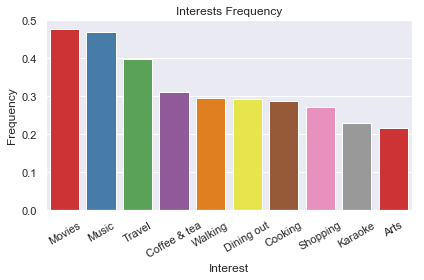

In [5]:
# Find the top 10 most common interests

def word_count(str):
    counts = dict()
    words = str.split(',')

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

interests = []
k = 1 
while k < len(data):
    interests.append(str(data['Interests'][k]))
    k += 1

total_interests = str(',').join(interests)
interest_count = word_count(total_interests)
del(interest_count['nan'])

interests_names = []
interests_counts = []
l = 0
for w in sorted(interest_count, key=interest_count.get, reverse=True):
    interests_names.append(w)
    interests_counts.append(interest_count[w]/len(data))
    l += 1
    if l == 10:
        break

interest_plot = sns.barplot(x=interests_names, y=interests_counts, palette='Set1')
interest_plot.set_xticklabels(interest_plot.get_xticklabels(), rotation=30, ha="center")
interest_plot.set_title('Interests Frequency')
interest_plot.set_xlabel('Interest')
interest_plot.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

From the data, we can see that the top 3 most common interests are movies, music, and travel.

## Age
We break down the proportion of ages in on our sample of profiles.

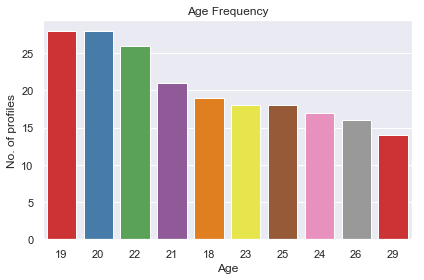

In [6]:
# Find the top 10 most common ages

age_plot = sns.countplot(x='age', data=data, palette='Set1', order=data['age'].value_counts().iloc[:10].index)
age_plot.set_title('Age Frequency')
age_plot.set_xlabel('Age')
age_plot.set_ylabel('No. of profiles')
plt.tight_layout()
plt.show()

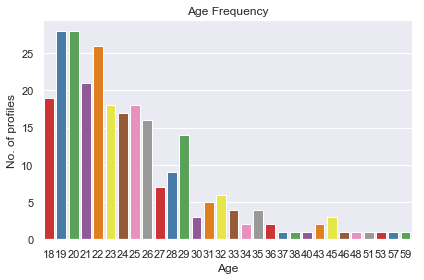

In [7]:
# Find the number of profiles for each age

age_plot_alt = sns.countplot(x='age', data=data, palette='Set1')
age_plot_alt.set_title('Age Frequency')
age_plot_alt.set_xlabel('Age')
age_plot_alt.set_ylabel('No. of profiles')
plt.tight_layout()
plt.show()

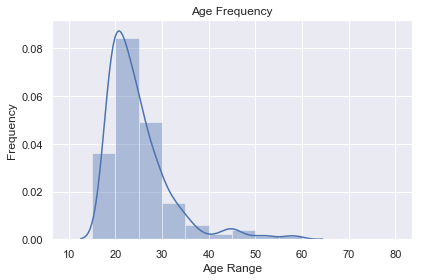

In [8]:
# Find the distribution of each age range

bins = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
age_hist = sns.distplot(data['age'], bins=bins)
age_hist.set_title('Age Frequency')
age_hist.set_xlabel('Age Range')
age_hist.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

From the data, we can see the biggest proportion of users is in their 20s, with the most during university schooling ages of 19 to to 22.

## Occupations
We break down the number of times that each occupation shows up on our sample of profiles.

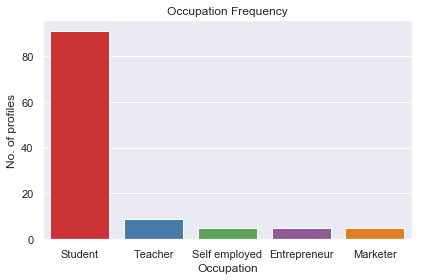

In [9]:
#Find the top 5 most common occupations

job_plot = sns.countplot(x='Occupation', data=data, palette='Set1', order=data['Occupation'].value_counts().iloc[:5].index)
job_plot.set_title('Occupation Frequency')
job_plot.set_xlabel('Occupation')
job_plot.set_ylabel('No. of profiles')
plt.tight_layout()
plt.show()

From the data, we can see that a large proportion of users are students. This corroborates our previous age data.